## ReCell - Problem Statement

Buying and selling used smartphones used to be something that happened on a handful of online marketplace sites. But the used and refurbished phone market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth $52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used smartphones that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing a smartphone. There are plenty of other benefits associated with the used smartphone market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished smartphones. Maximizing the longevity of mobile phones through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost the cheaper refurbished smartphone segment, as consumers cut back on discretionary spending and buy phones only for immediate needs.

### Objective
The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished smartphones. ReCell, a startup aiming to tap the potential in this market, wants to analyze the data provided, build a linear regression model to predict the price of a used phone and identify factors that significantly influence it.

The data contains the different attributes of used/refurbished phones. The detailed data dictionary is given below.

    brand_name: Name of manufacturing brand
    os: OS on which the phone runs
    screen_size: Size of the screen in cm
    4g: Whether 4G is available or not
    5g: Whether 5G is available or not
    main_camera_mp: Resolution of the rear camera in megapixels
    selfie_camera_mp: Resolution of the front camera in megapixels
    int_memory: Amount of internal memory (ROM) in GB
    ram: Amount of RAM in GB
    battery: Energy capacity of the phone battery in mAh
    weight: Weight of the phone in grams
    release_year: Year when the phone model was released
    days_used: Number of days the used/refurbished phone has been used
    new_price: Price of a new phone of the same model in euros
    used_price: Price of the used/refurbished phone in euros

In [280]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

In [281]:
# loading the dataset
data = pd.read_csv("used_phone_data.csv")

data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
0,Honor,Android,23.97,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62,86.96
1,Honor,Android,28.10,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,161.49
2,Honor,Android,24.29,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47,268.55
3,Honor,Android,26.04,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.93,180.23
4,Honor,Android,15.72,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.87,103.80


In [282]:
# check number of rows and columns
data.shape

(3571, 15)

  * The dataset has 3571 rows and 15 columns

In [283]:
# checking column datatypes and number of non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3571 non-null   object 
 1   os                3571 non-null   object 
 2   screen_size       3571 non-null   float64
 3   4g                3571 non-null   object 
 4   5g                3571 non-null   object 
 5   main_camera_mp    3391 non-null   float64
 6   selfie_camera_mp  3569 non-null   float64
 7   int_memory        3561 non-null   float64
 8   ram               3561 non-null   float64
 9   battery           3565 non-null   float64
 10  weight            3564 non-null   float64
 11  release_year      3571 non-null   int64  
 12  days_used         3571 non-null   int64  
 13  new_price         3571 non-null   float64
 14  used_price        3571 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 418.6+ KB


   * brand_name, os, 4g and 5g are categorical while all others are numerical data types
   * main_camera_mp, selfie_camera_mp, int_memory, ram, battery and weight have missing values, these will be fixed soon
   * used_price is the dependant variable

In [284]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3571,34,Others,509,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3571,4,Android,3246,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3571.0,NaN,NaN,NaN,14.803892,5.153092,2.7,12.7,13.49,16.51,46.36
4g,3571,2,yes,2359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3571,2,no,3419,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3391.0,NaN,NaN,NaN,9.400454,4.818396,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3569.0,NaN,NaN,NaN,6.547352,6.879359,0.3,2.0,5.0,8.0,32.0
int_memory,3561.0,NaN,NaN,NaN,54.532607,84.696246,0.005,16.0,32.0,64.0,1024.0
ram,3561.0,NaN,NaN,NaN,4.056962,1.391844,0.03,4.0,4.0,4.0,16.0
battery,3565.0,NaN,NaN,NaN,3067.225666,1364.206665,80.0,2100.0,3000.0,4000.0,12000.0


   * There are 34 different manufacturing brands, 4 different operating systems, 4gs or 5gs have either values yes or no for different phones
   * Anroid is the most popular os, with 3246 phones running on the same
   * 2359 phones have 4g available and only 152 phones have 5g available
   * The average values for most numerical data types like screen_size, main_camera_mp, selfie_camera_mp, int_memory, battery, weight, new_price and used_price are larger than median values, indicating that data may be skewed right
   * The average values and median values are almost similar for amount of RAM in GB, indicating very little skwewness, if any
   * The average values for number of days the used/ refurbished phone has been used is less than median value, indicating data maybe skewed left

In [285]:
# creating a copy of the data to avoid any changes to original data
df = data.copy()

### Exploratory Data Analysis (EDA)

In [286]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [287]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Distribution of used and new phone prices 

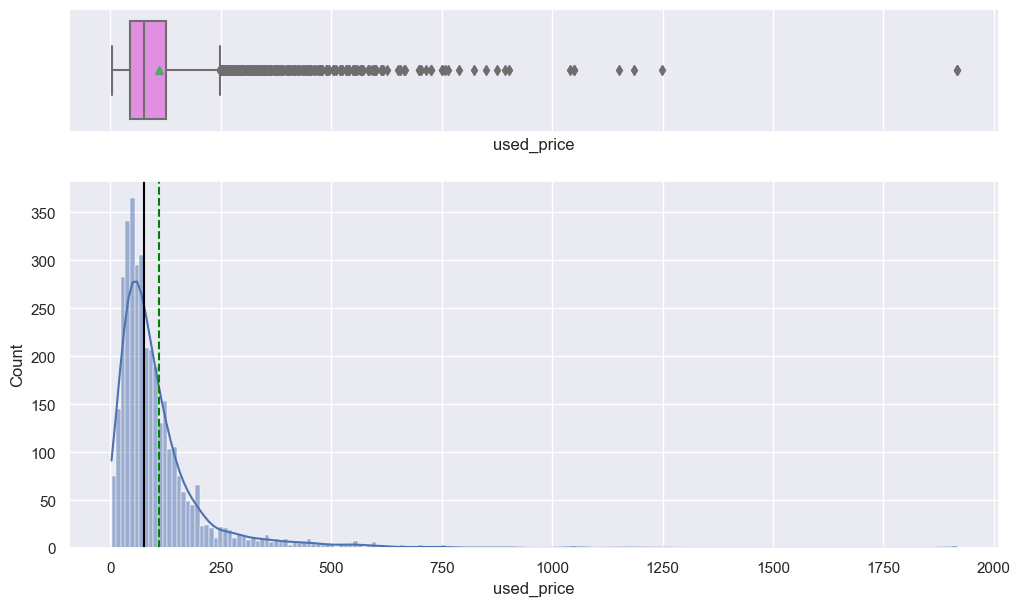

In [288]:
histogram_boxplot(df, "used_price", kde=True)

Le prix d'utilisation moyen est d'env. 110 € alors que le prix médian utilisé_prix env. 75,53 €. Les données sont fortement faussées vers la droite, ce qui indique que plusieurs téléphones ont un prix d'utilisation élevé

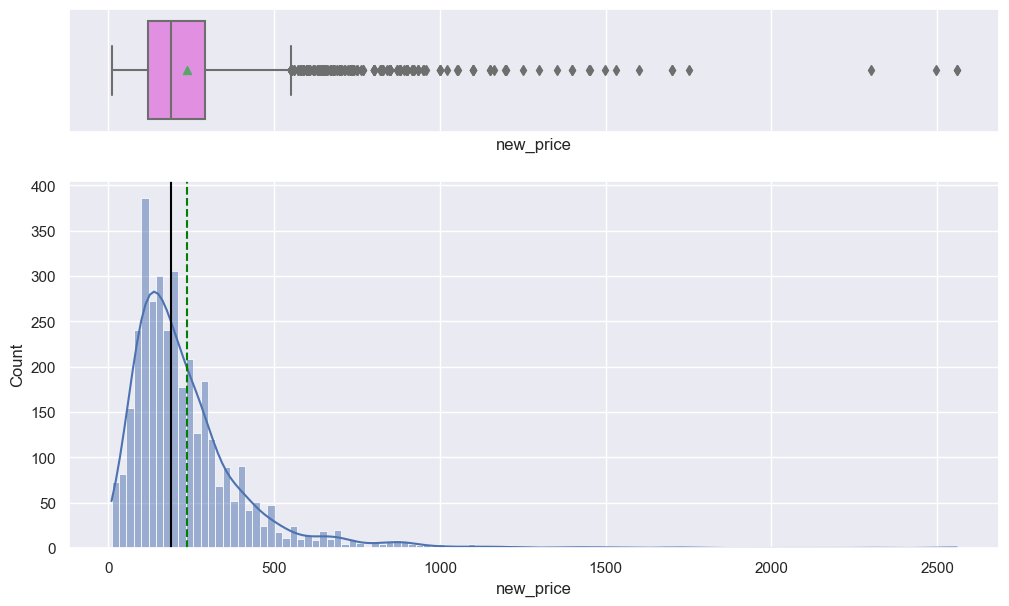

In [289]:
histogram_boxplot(df, "new_price", kde=True)

   * The mean new_price is approx. €237 (2.15 times mean used_price) while the median new_price is approx. €190 (2.5 times median used_price). The data is also skewed right, indicating some phones have high new_price

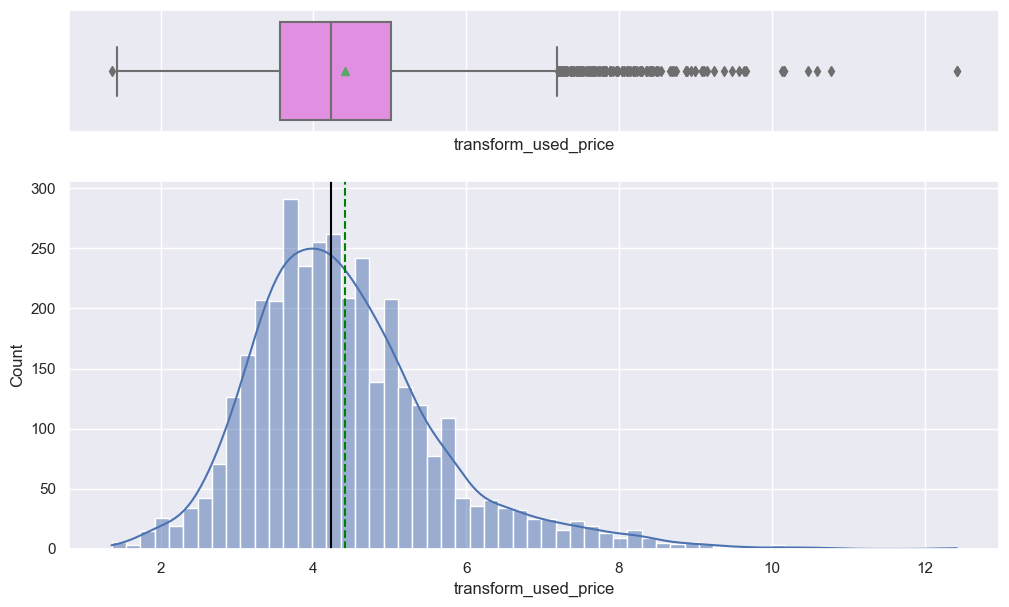

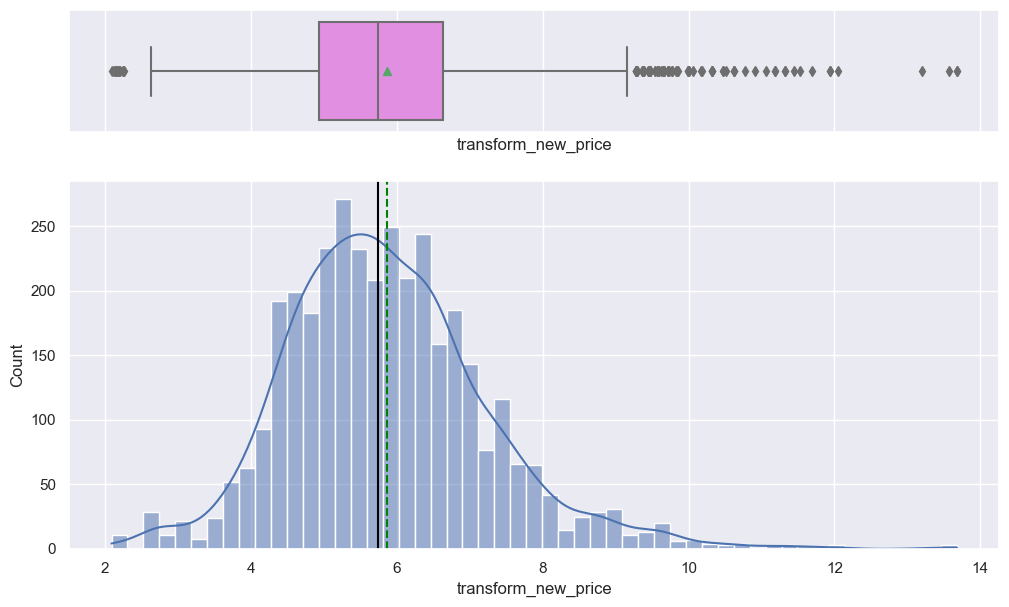

In [290]:
# transforming the data to improve visualization
# model was run with no transformation , sqrt() transformation, cbrt() transformation and log transformation
# to evaluate model performance, and assumptions - residuals vs fitted plot, homoscedasticity check etc
# cbrt() transformation outlined below

df["transform_used_price"] = np.cbrt(df["used_price"])
histogram_boxplot(df, "transform_used_price", kde=True)
plt.show()

df["transform_new_price"] = np.cbrt(df["new_price"])
histogram_boxplot(df, "transform_new_price", kde=True)

* The cbrt plot of used_price and new_price appears to follow a normal distribution, and data is much easier to visualize and interpret

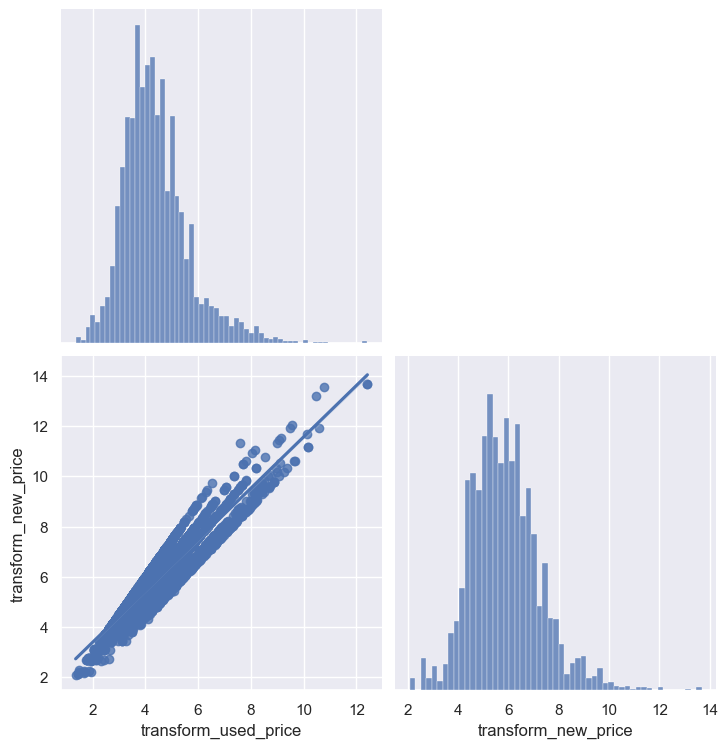

Linear correlation factor between cbrt(used_price) and cbrt(new_price) 0.93
Linear correlation factor between used_price and new_price 0.93


In [291]:
g = sns.pairplot(data = df[["transform_used_price","transform_new_price"]], corner=True, kind="reg")
g.fig.set_size_inches(8,8)
plt.show()
print("Linear correlation factor between cbrt(used_price) and cbrt(new_price)", \
      round(df.corr()["transform_used_price"]["transform_new_price"] , 2))
print("Linear correlation factor between used_price and new_price", \
      round(df.corr()["used_price"]["new_price"] , 2))

 * The linear corrleation between the transformmed columns - cbrt(used_price) and cbrt(new_price) is same as before transformation; strongly positively correlated with correlation factor 0.93

### Distribution of operating systems

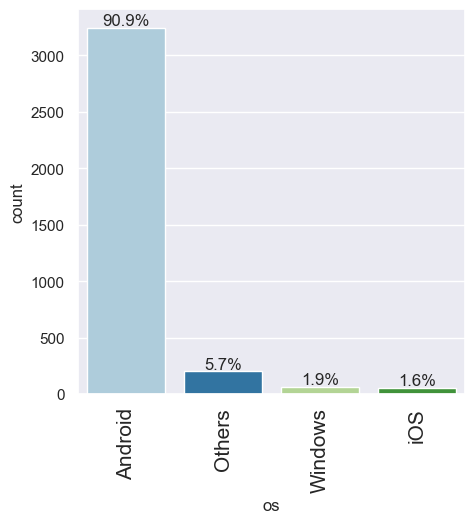

In [292]:
labeled_barplot(df, "os", perc=True)

   * More than 90% of the used phone market is dominated by andorid devices

In [293]:
# since android is clearly dominating the os market, we can group others, windows and iOS together 
# as a category- "not_Android"

df.loc[df.os=="Others", "os"] = "not_Android"
df.loc[df.os=="Windows", "os"] = "not_Android"
df.loc[df.os=="iOS", "os"] = "not_Android"

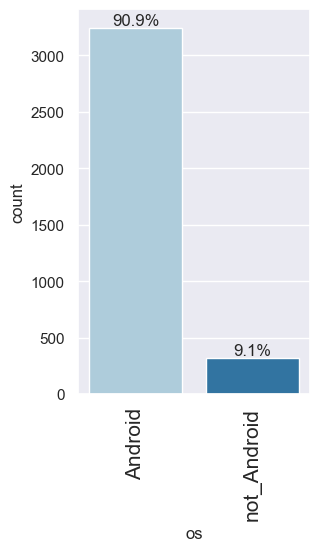

In [294]:
labeled_barplot(df, "os", perc=True)

### Distribution of RAM offered by different manufacturing brands

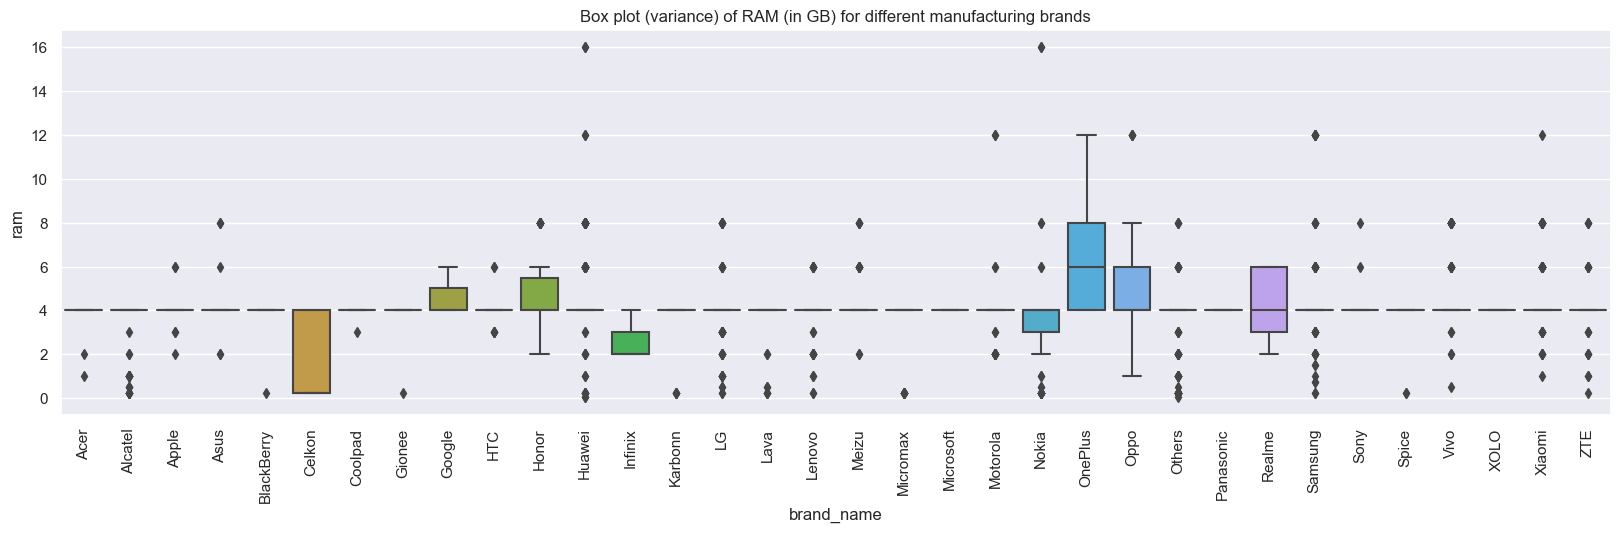

In [295]:
plt.figure(figsize=(20,5))

sns.boxplot(data = df.sort_values("brand_name", ascending=True), x = "brand_name", y="ram");
plt.xticks(rotation=90)
plt.title("Box plot (variance) of RAM (in GB) for different manufacturing brands")
plt.show()

* The minimun, 25%, 50%, 75% and maximum RAM (in GB) for several manufacturing brands are the same i.e. 4GB indicating little variance (spread), or absence of a defined "box"plot. However, there are still outliers present (very high or very low RAM (in GB))

### Distribution of phones with large screen size (>6 inches) offered by different manufacturing brands 

In [296]:
#6 inches = 6*2.54cm = 15.24cm
df_largescreen = df[df["screen_size"]>15.24]
print(df_largescreen.shape)

(1235, 17)


* There are 1235 refurbished phones with large screen size (i.e. >6 inches)

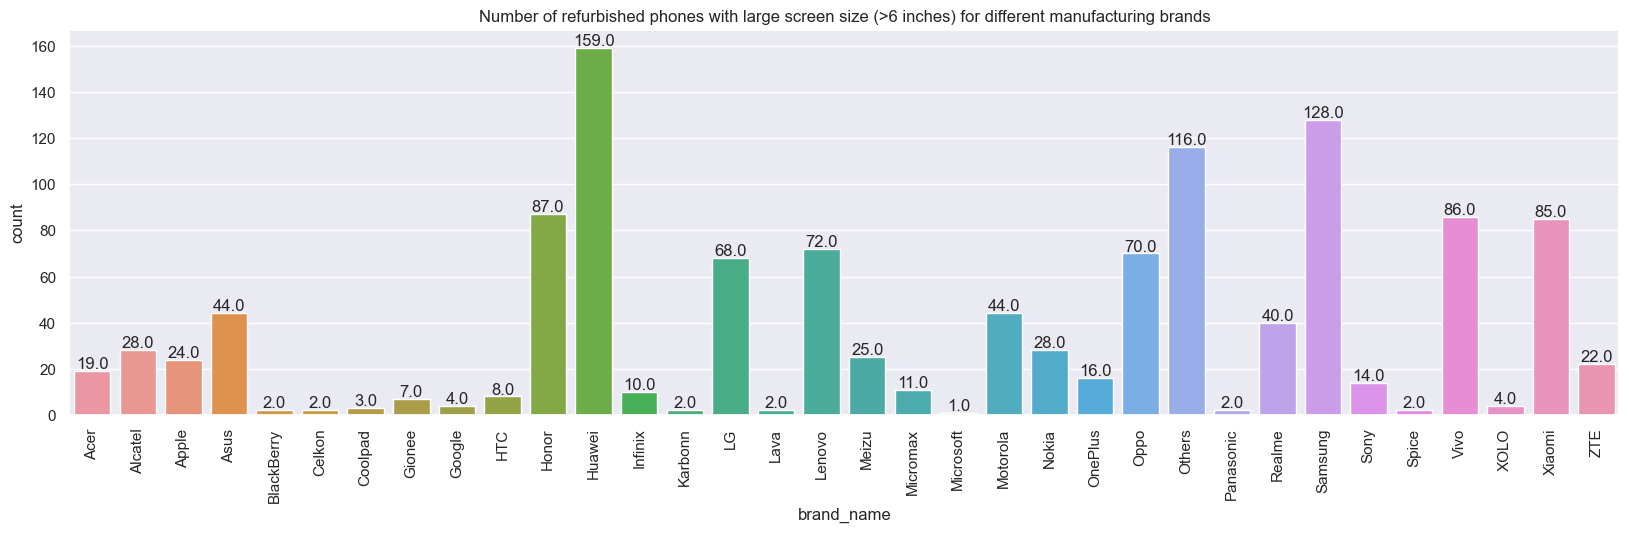

In [297]:
plt.figure(figsize=(20,5))

ax = sns.countplot(data = df_largescreen.sort_values("brand_name", ascending=True), x = "brand_name");
plt.xticks(rotation=90)
plt.title("Number of refurbished phones with large screen size (>6 inches) for different manufacturing brands")
for p in ax.patches:
    label = p.get_height()
    x = p.get_x() + p.get_width() / 2 
    y = p.get_height() 
    ax.annotate(label,(x, y),ha="center",va="center",size=12,xytext=(0, 5),textcoords="offset points",)  
plt.show()

   * Huawei has the highest number of refurbished phones with large screen (i.e. 159 phones), followed by Samsung (128 phones), Honor (87 phones), Vivo (86 phones), Xiaomi (85 phones) and Oppo (70 phones) among known manufacturing brands
   * Microsoft (1 phone), Blackberry/Celkon/Karbonn/Lava/Panasonic/Spice (2 phones) have the lowest number of refurbished phones with large screen size 

### Distributions of phones with great selfie camera (>8MP) offered by different manufacturing brands

In [298]:
df_greatselfiecamera = df[df["selfie_camera_mp"]>8]
print(df_greatselfiecamera.shape)

(666, 17)


* There are 666 refurbished phones with great selfie cameras (i.e. > 8MP)

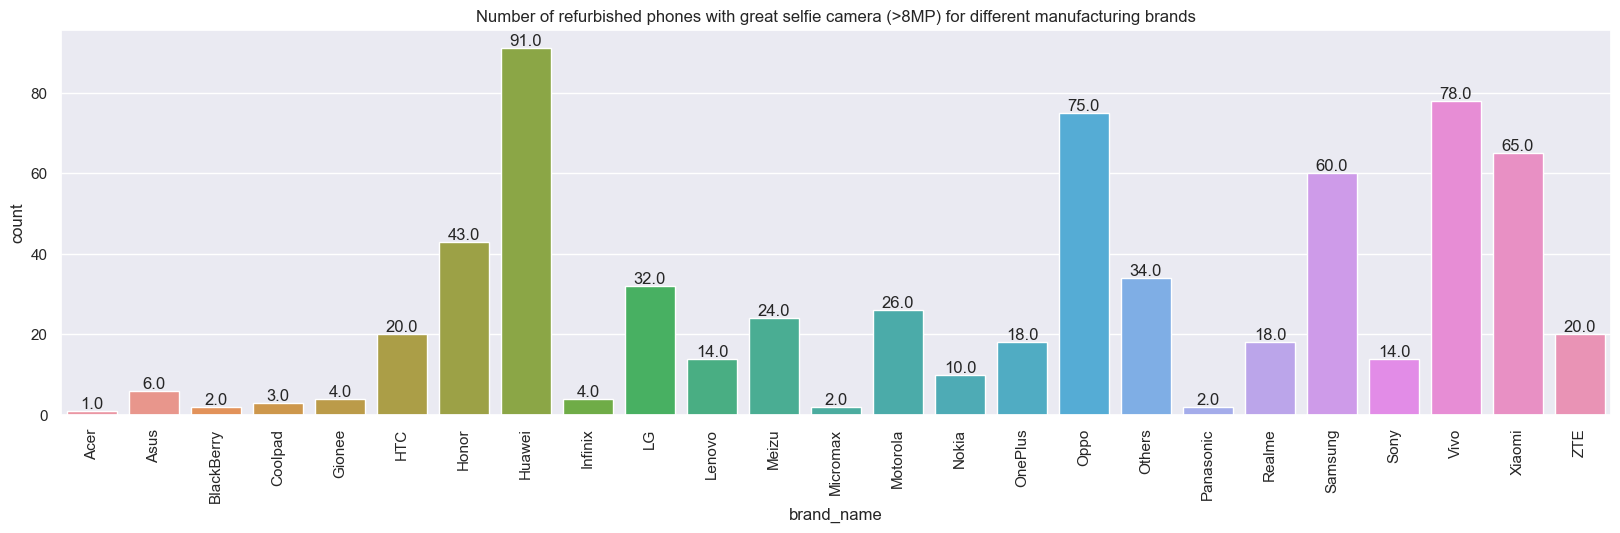

In [299]:
plt.figure(figsize=(20,5))

ax = sns.countplot(data = df_greatselfiecamera.sort_values("brand_name", ascending=True), x = "brand_name");
plt.xticks(rotation=90)
plt.title("Number of refurbished phones with great selfie camera (>8MP) for different manufacturing brands")
for p in ax.patches:
    label = p.get_height()
    x = p.get_x() + p.get_width() / 2 
    y = p.get_height() 
    ax.annotate(label,(x, y),ha="center",va="center",size=12,xytext=(0, 5),textcoords="offset points",)  
plt.show()

 * Huawei (91 phones), Oppo (75 phones), Vivo (78 phones), Xiaomi (65 phones) and Samsung (60 phones) have some of the highest number of refurbished phones with a great selfie camera (>8MP) - similar brand names observed as for phones with large screen size
 * Acer (1 phone), Blackberry/Microsoft/Panasonic (2 phones) have some of the lowest number of refurbished phones with a great selfie camera (>8MP)

In [300]:
# We will now bucket the 34 manufacturing brands into 3 categories on the average price of a new phone 
# by that manufacturing brand i.e. 
# low_range  : <€150
# mid_range  : €150-€250
# high_range : >€250
 

df.groupby("brand_name").mean()["new_price"].sort_values()

brand_name
Celkon         60.956486
Spice          98.000000
Infinix       106.017000
Micromax      106.964667
Lava          107.424722
Karbonn       110.384333
Nokia         130.600802
XOLO          130.898571
Alcatel       142.499092
Microsoft     166.366818
Panasonic     171.426596
Acer          172.867647
Realme        186.031415
Others        191.112094
Lenovo        193.358779
Coolpad       194.285455
Motorola      209.448464
ZTE           216.800922
BlackBerry    234.774545
Honor         235.897915
LG            242.218203
HTC           249.853818
Asus          250.998766
Gionee        255.379286
Xiaomi        257.326422
Meizu         269.569242
Sony          280.829676
Samsung       293.854500
Vivo          320.268355
Huawei        323.960091
Oppo          341.912481
Google        474.716667
OnePlus       558.230818
Apple         639.004941
Name: new_price, dtype: float64

In [301]:
df.loc[df.new_price>0, "brand_name"] = "low_range"
df.loc[df.new_price>=150, "brand_name"] = "mid_range"
df.loc[df.new_price>=250, "brand_name"] = "high_range"

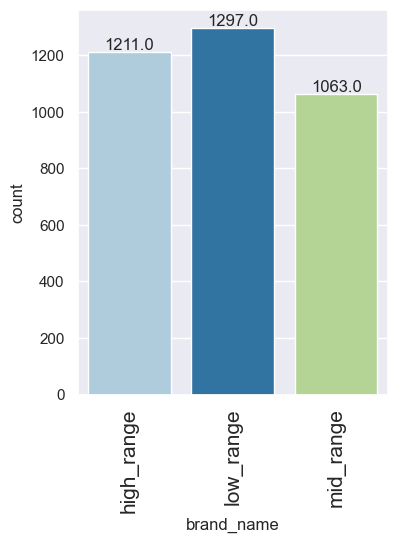

In [302]:
labeled_barplot(df, "brand_name")

 * There are now 3 manufacturing brand categories - low_range : 1297 refurbished phones, mid_range : 1063 refurbished phones and high_range : 1211 refurbished phones
 * The distribution is not skewed in either of the 3 categories

### Relation between a phone's weight and battery for phone offering large batteries (more than 4500 mAh)

In [303]:
df_largebatteries = df[df["battery"]>4500]
print(df_largebatteries.shape)

(346, 17)


   * There are 346 refurbished phones with large batteries (i.e. >4500 mAh) 

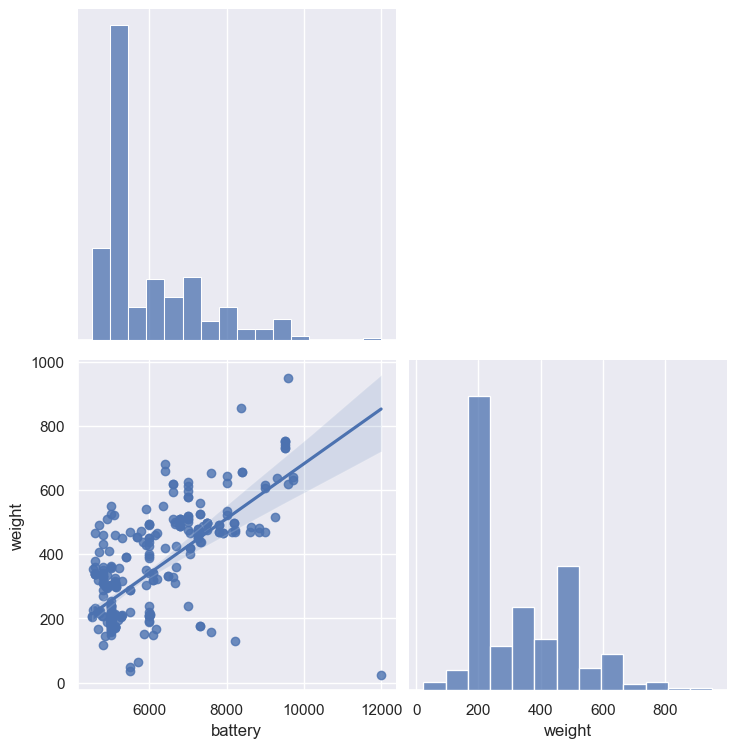

Linear correlation factor between phone's weight and battery 0.7


In [304]:
g = sns.pairplot(data = df_largebatteries[["battery","weight"]], corner=True, kind="reg")
g.fig.set_size_inches(8,8)
plt.show()
print("Linear correlation factor between phone's weight and battery", \
      round(df_largebatteries.corr()["weight"]["battery"] , 2))

We see a moderate correlation (0.7) between a phone's weight and battery drawing the conclusion that as the battery size increases, so does the weight

### Linear correlation between numerical attributes and used phone price

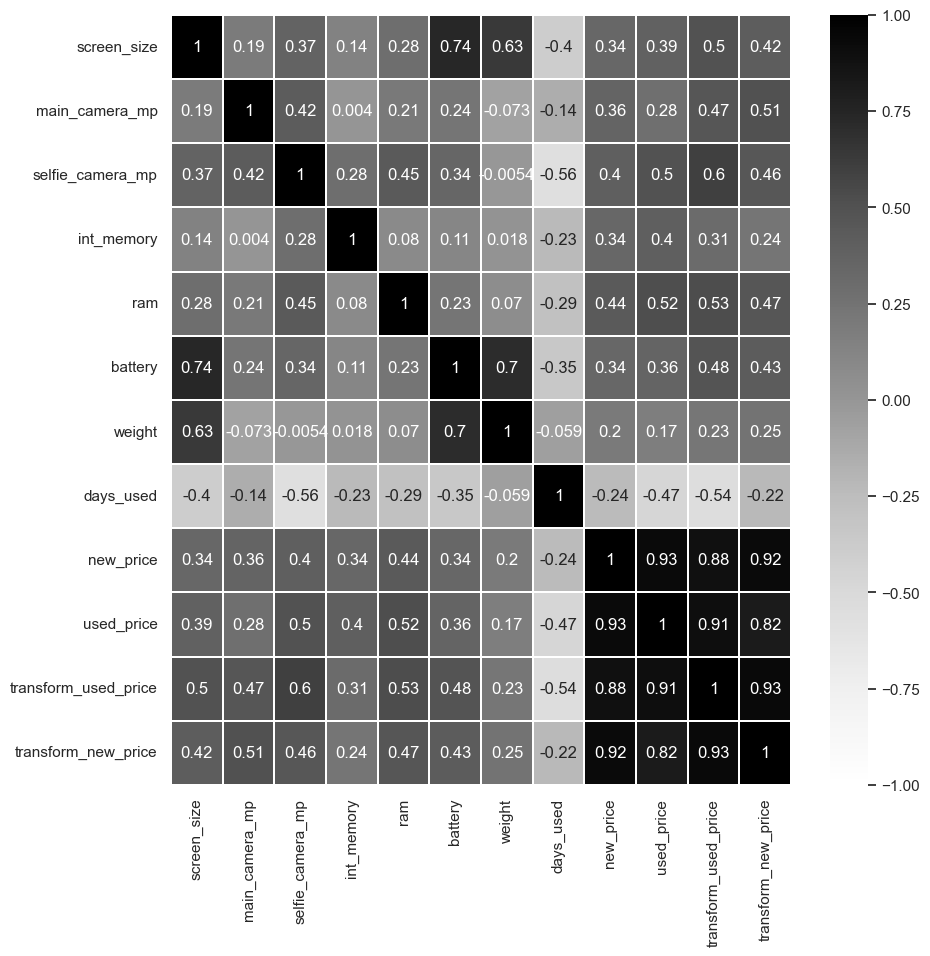

In [305]:
numeric_columns = df.select_dtypes(include=np.number).columns.to_list()
numeric_columns.remove("release_year") #as it is a temporal variable

plt.figure(figsize=(10,10))
sns.heatmap(df[numeric_columns].corr(), annot=True, vmin=-1, vmax=1, cmap="Greys", linewidths=0.05);

* used_price and cbrt(used_price) are negatively correlated with days_used (-0.47 and -0.54 respectively)
* used_price and cbrt(used_price) are strongly-positively correlated with new_price and cbrt(new_price) respectively (0.93 in both instances)
* used_price and cbrt(used_price) are moderately-positively correlated with selfie_camera (0.5 and 0.6), main_camera (0.28 and 0.47), screen_size (0.39 and 0.5), battery (0.36 and 0.48); the correlation is higher for cbrt(used_price) than used_price
* For our modeling, we will use cbrt(used_price) and cbrt(new_price)

In [306]:
df.drop("used_price", axis=1, inplace=True)
df.drop("new_price", axis=1, inplace=True)

### Missing value treatment

In [307]:
df.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp          180
selfie_camera_mp          2
int_memory               10
ram                      10
battery                   6
weight                    7
release_year              0
days_used                 0
transform_used_price      0
transform_new_price       0
dtype: int64

   * The dependent variable cbrt(used_price) does not have any missing values 

In [308]:
medianFiller = lambda x:x.fillna(x.median())

brand_names = df["brand_name"].unique()
numeric_column = df.select_dtypes(include = np.number).columns.to_list()

# we will group by brand name (low-range, mid-range or high-range), and for each numeric column, we will replace 
# the missing value with the median value of the numeric column of the respective brand name 

for item in brand_names:
    df.loc[df.brand_name==item, numeric_column] = \
    df.loc[df.brand_name==item, numeric_column].apply(medianFiller, axis=0)

In [309]:
df.isnull().sum()

brand_name              0
os                      0
screen_size             0
4g                      0
5g                      0
main_camera_mp          0
selfie_camera_mp        0
int_memory              0
ram                     0
battery                 0
weight                  0
release_year            0
days_used               0
transform_used_price    0
transform_new_price     0
dtype: int64

* All the missing values have been treated.

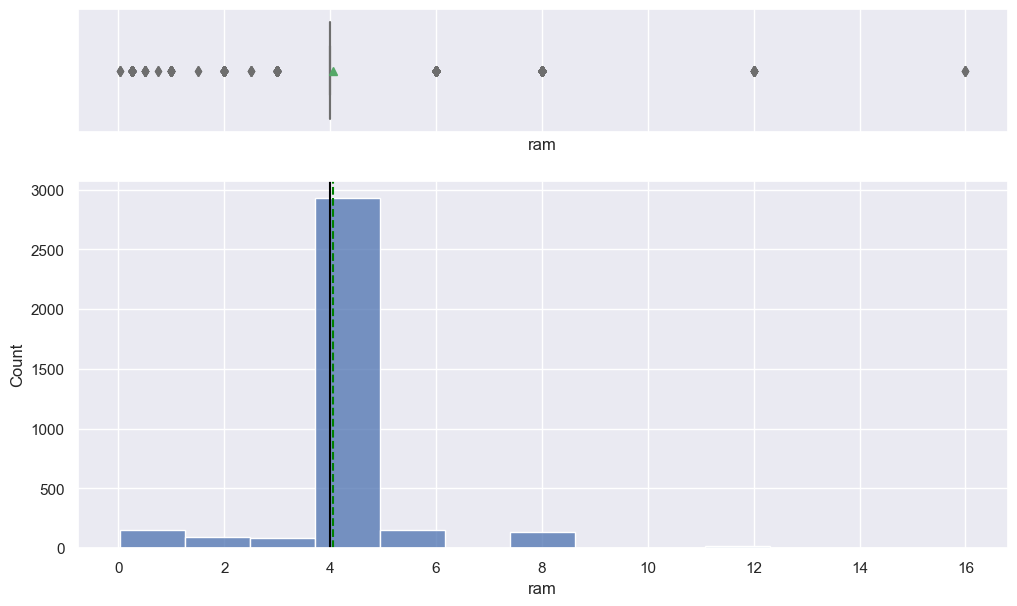

In [310]:
histogram_boxplot(df, "ram")

* We will drop "RAM" column as majority of dataset has a constant RAM of 4GB with a few upper and lower outliers.

In [311]:
df.drop("ram", axis=1, inplace=True)

In [312]:
numeric_columns.remove("ram")
numeric_columns.remove("new_price")
numeric_columns.remove("used_price")

### Outlier detection and treatment 

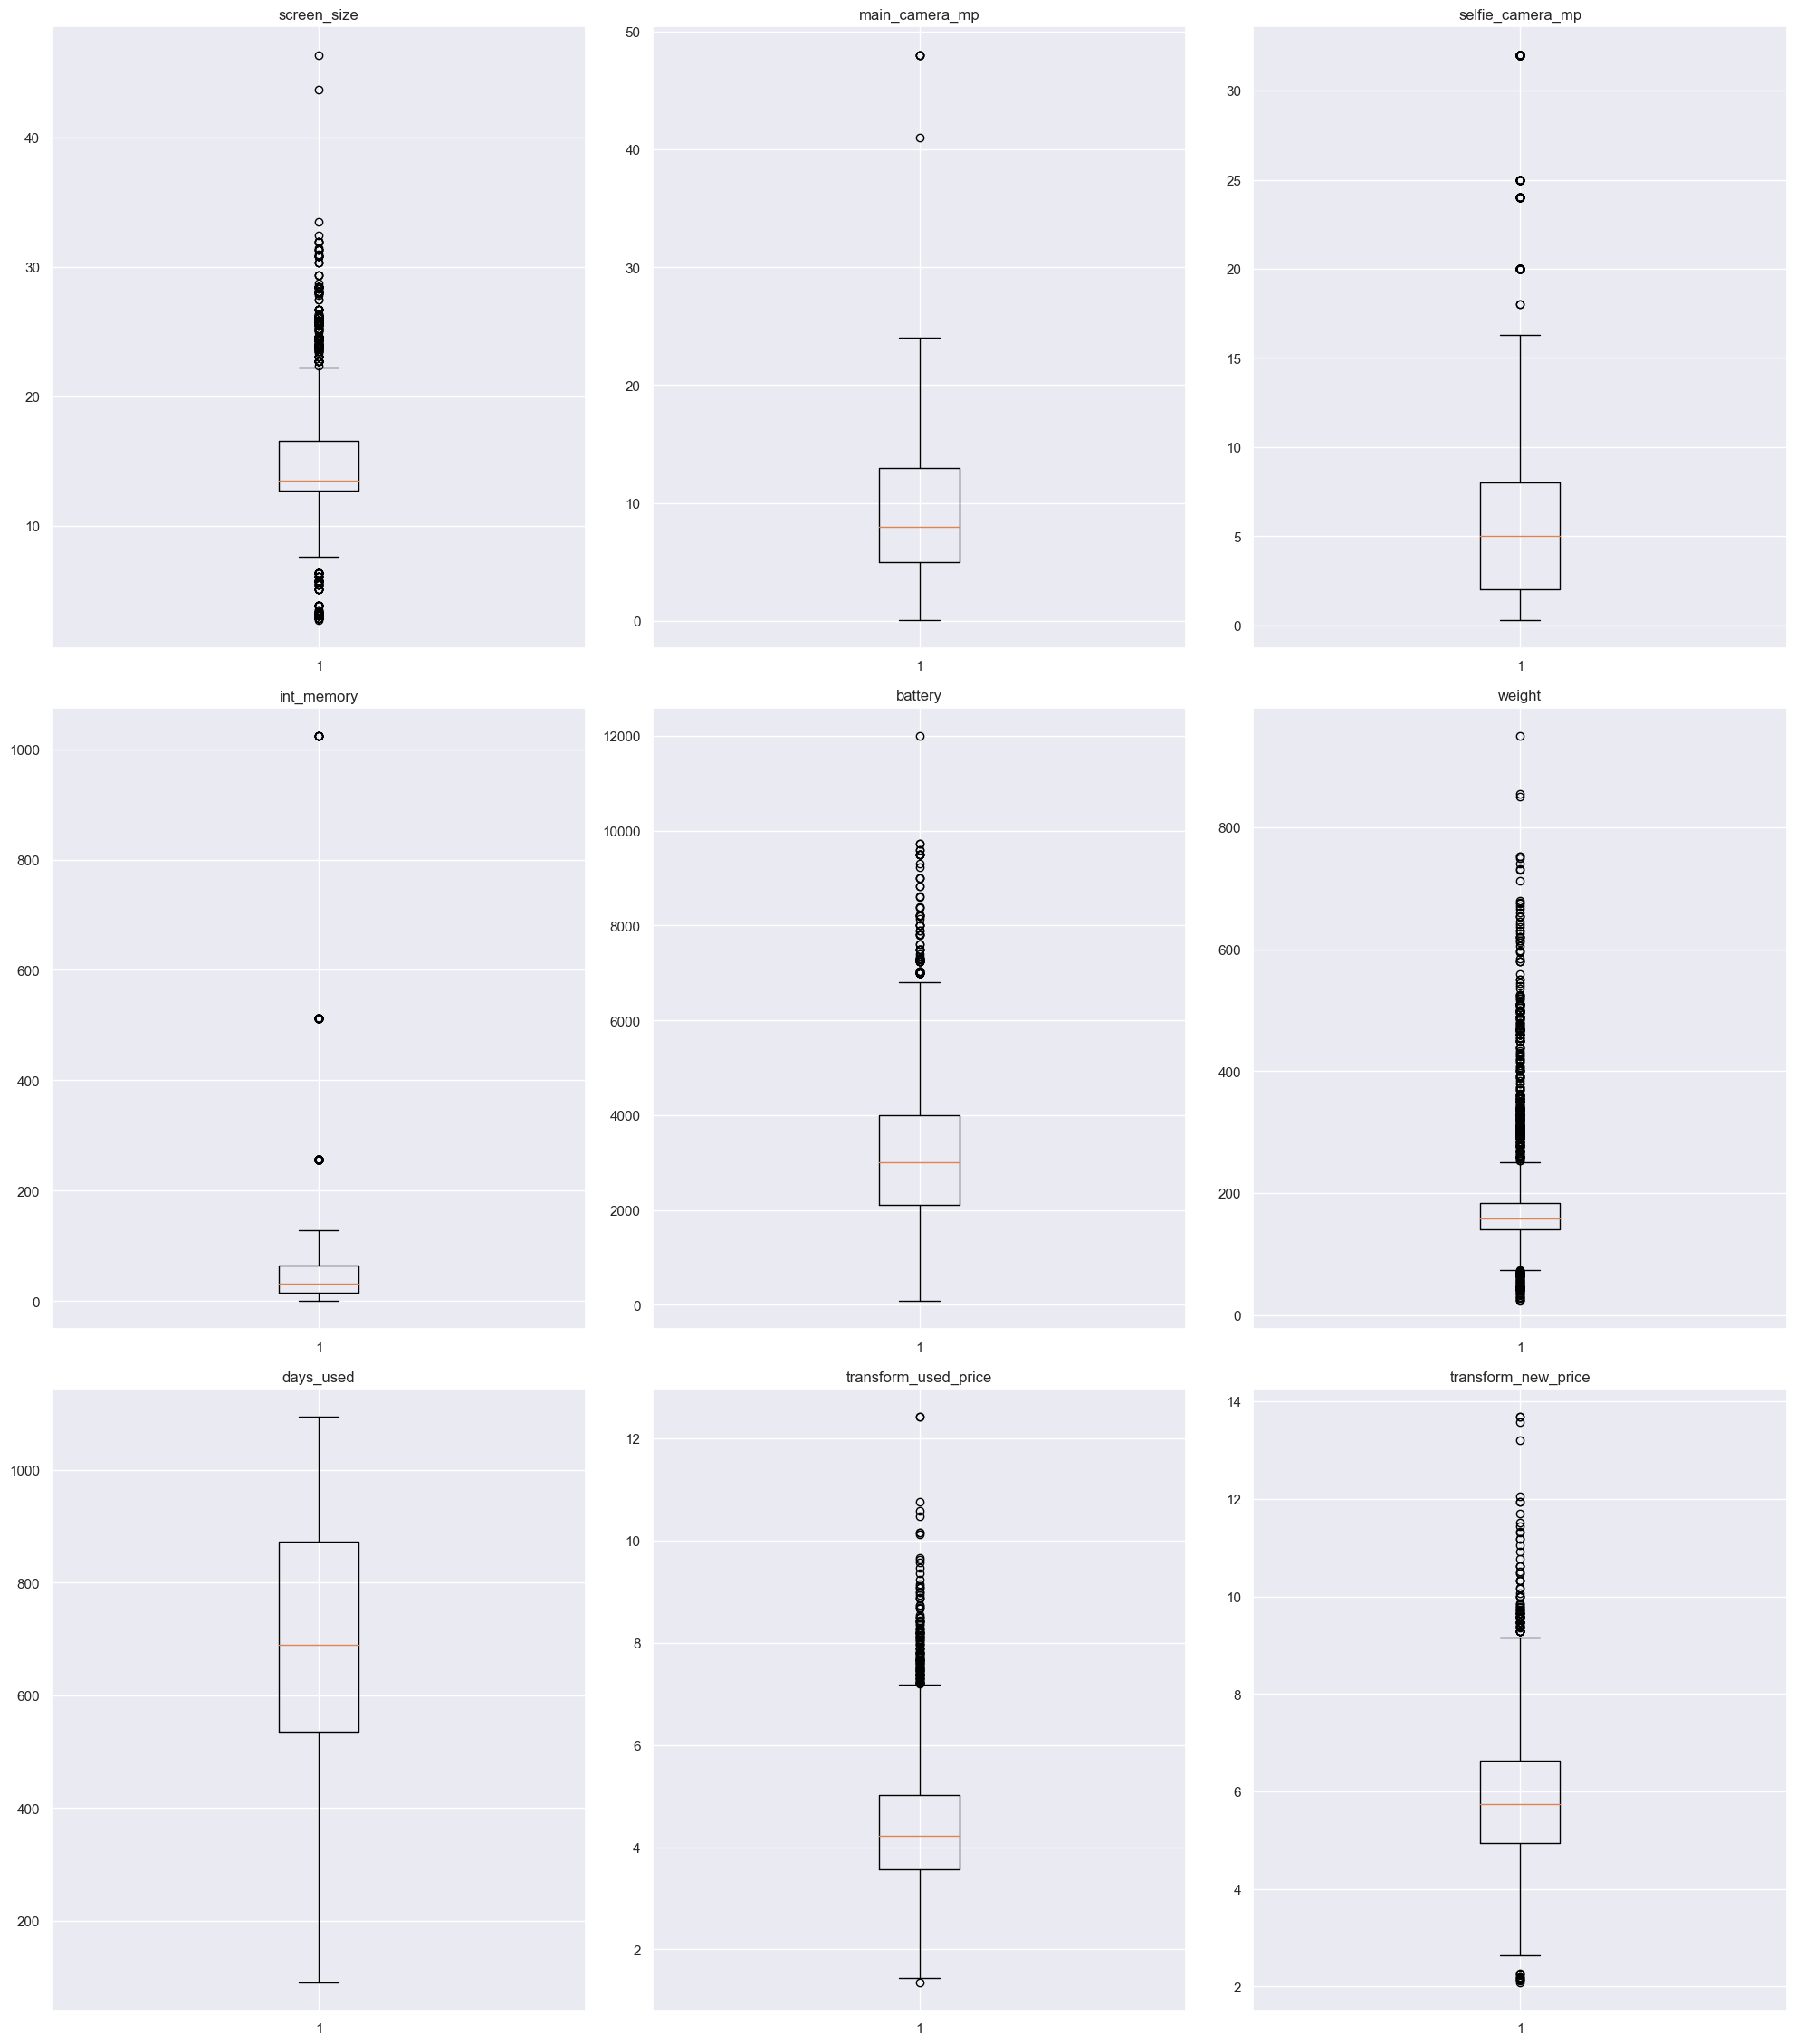

In [313]:
# let's plot the boxplots of all columns to check for outliers

plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4,3, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* There are no outliers in the days_used column

* There are a few upper outliers in the main_camera_mp, selfie_camera_mp, int_memory and battery. There are more than a few lower and upper outliers in the screen_size and weight columns

* We will perform flooring and capping to remove these outliers and build our model


* There are some upper outliers in the cbrt(new_price) independent and cbrt(used_price) dependent columns

In [314]:
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: data frame
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [315]:
# treating the outliers
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
df = treat_outliers_all(df, numerical_col)

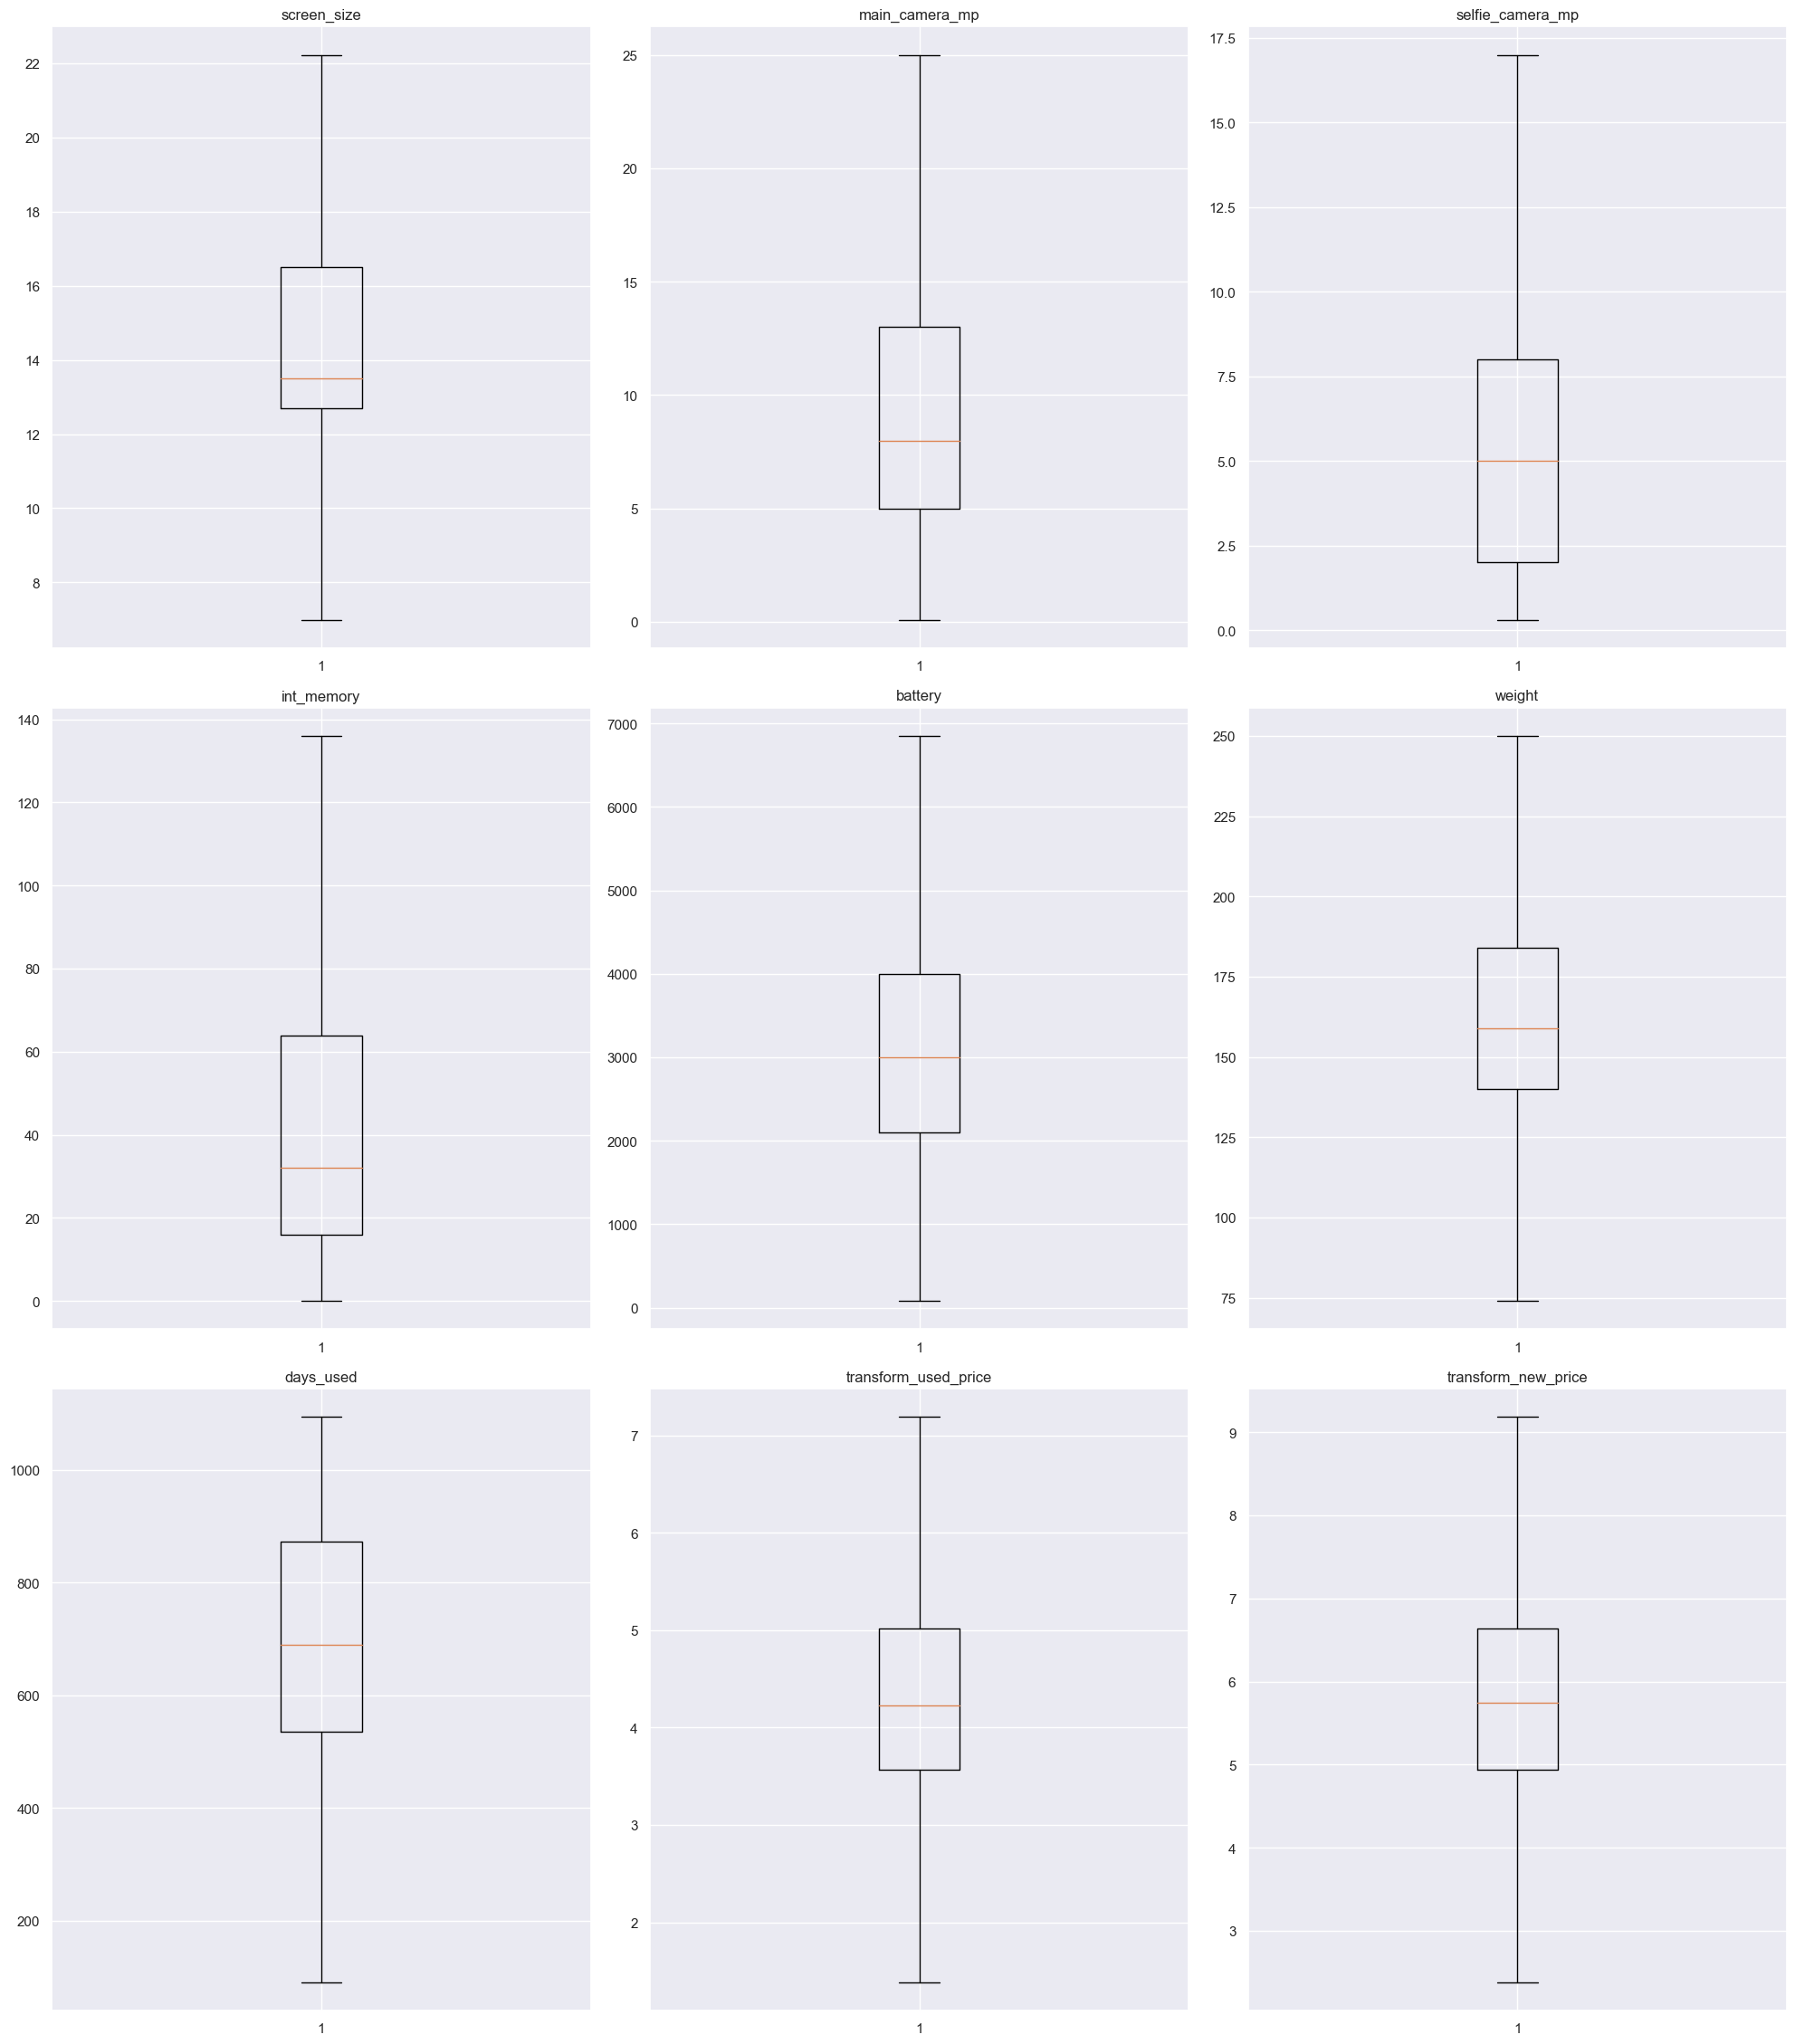

In [316]:
# let's look at the boxplots to see if the outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 3, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* All outliers have been treated 

### Reanalyzing distribution of phones with large screen size (>6 inches), phones with great selfie camera (>8MP), offered by different manufacturing brands 


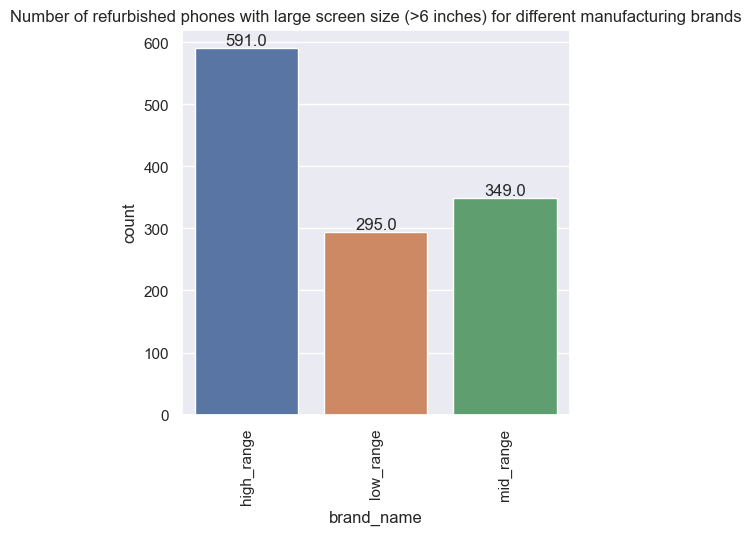

In [317]:
#6 inches = 6*2.54cm = 15.24cm
df_largescreen = df[df["screen_size"]>15.24]

plt.figure(figsize=(5,5))

ax = sns.countplot(data = df_largescreen.sort_values("brand_name", ascending=True), x = "brand_name");
plt.xticks(rotation=90)
plt.title("Number of refurbished phones with large screen size (>6 inches) for different manufacturing brands")
for p in ax.patches:
    label = p.get_height()
    x = p.get_x() + p.get_width() / 2 
    y = p.get_height() 
    ax.annotate(label,(x, y),ha="center",va="center",size=12,xytext=(0, 5),textcoords="offset points",)  
plt.show()

   * High_range brands offer maximum number of refurbished phones with large screen size (591 phones), followed by mid_range brands (349 phones) and then low_range brands (295 phones)

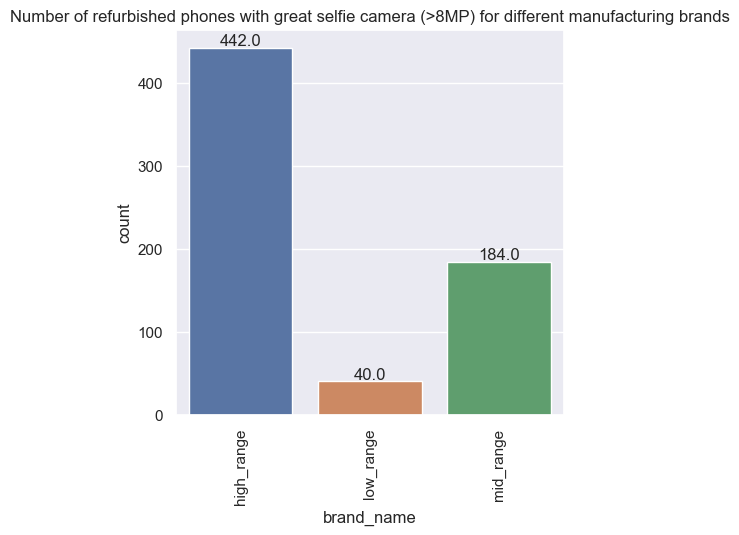

In [318]:
df_greatselfiecamera = df[df["selfie_camera_mp"]>8]

plt.figure(figsize=(5,5))

ax = sns.countplot(data = df_greatselfiecamera.sort_values("brand_name", ascending=True), x = "brand_name");
plt.xticks(rotation=90)
plt.title("Number of refurbished phones with great selfie camera (>8MP) for different manufacturing brands")
for p in ax.patches:
    label = p.get_height()
    x = p.get_x() + p.get_width() / 2 
    y = p.get_height() 
    ax.annotate(label,(x, y),ha="center",va="center",size=12,xytext=(0, 5),textcoords="offset points",)  
plt.show()

* We see brands following a similar trend with regards to selfie_camera as for bigger_screen_size (i.e., similar to what was observed before feature engineering)
* High_range brands offer the maximum number of refurbished phones with great selfie_camera (442 phones), followed by mid_range brands (184 phones) and then low_range brands (40 phones)

### Reanalyzing the relation between a phone's weight and battery for phone offering large batteries (more than 4500 mAh)

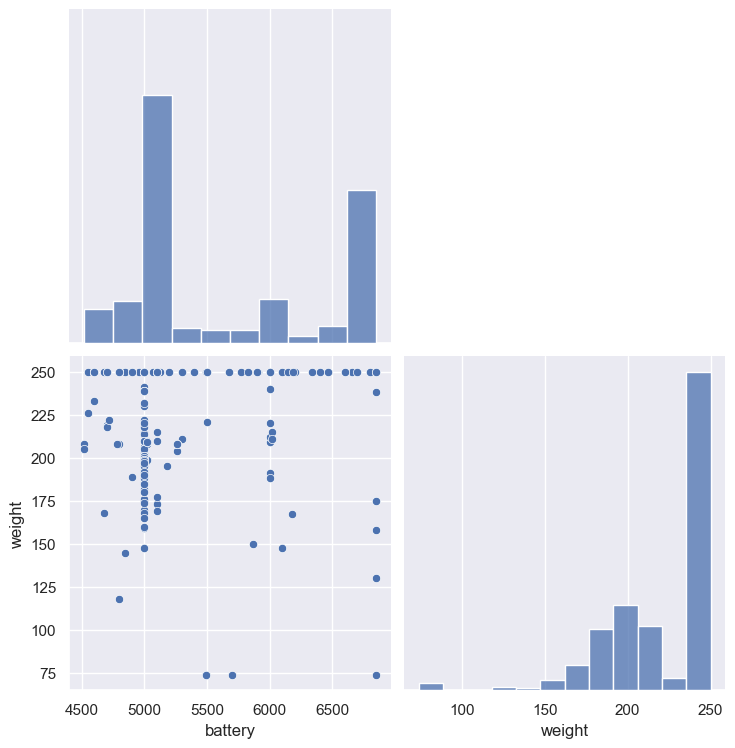

Linear correlation factor between phone's weight and battery 0.4


In [319]:
df_largebatteries = df[df["battery"]>4500]

g = sns.pairplot(data = df_largebatteries[["battery","weight"]], corner=True)
g.fig.set_size_inches(8,8)
plt.show()
print("Linear correlation factor between phone's weight and battery", \
      round(df_largebatteries.corr()["weight"]["battery"] , 2))

* The linear correlation between a phone's weight and battery has dropped from 0.7 to 0.4 after outlier treatment, i.e., has become weaker

### Reanalyzing linear correlation between numerical attributes and used phone price

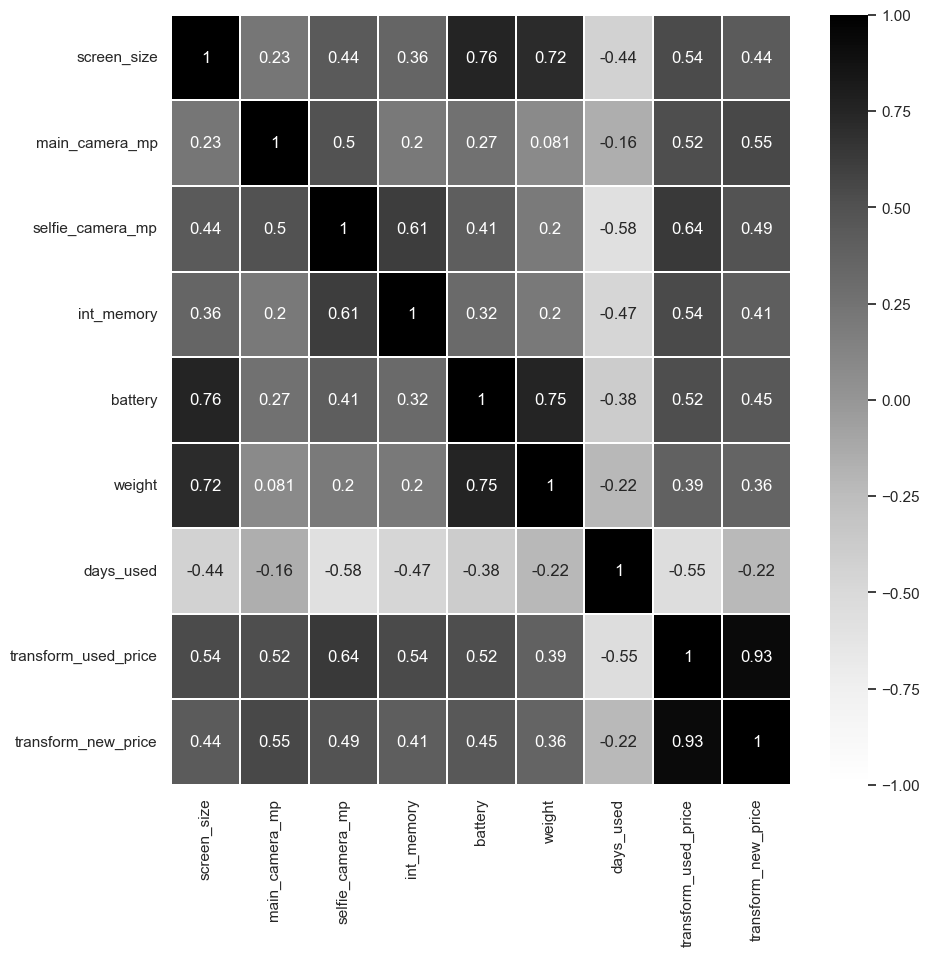

In [320]:
numeric_columns = df.select_dtypes(include=np.number).columns.to_list()
numeric_columns.remove("release_year") #as it is a temporal variable

plt.figure(figsize=(10,10))
sns.heatmap(df[numeric_columns].corr(), annot=True, vmin=-1, vmax=1, cmap="Greys", linewidths=0.05);

* cbrt(used_price) has become marginally more negatively correlated with number of days_used (-0.55 vs. -0.54 before outlier treatment)
* cbrt(used_price) is still strongly-positively correlated with cbrt(new_price) ; 0.93 before & after outlier treatment 
* The linear correlation with selfie_camera (0.64 vs. 0.6 before), main_camera (0.52 vs. 0.47 before), screen_size (0.54 vs. 0.5 before), battery ( 0.52 vs. 0.48 before) have all increased in comparison to values before outlier treatment  

## Linear Model Building 

In [321]:
# defining X and y variables
X = df.drop(["transform_used_price", "release_year"], axis=1) # since year is a temporal variable
y = df["transform_used_price"]

print(X.head())
print(y.head())

   brand_name       os  screen_size   4g   5g  main_camera_mp  \
0   low_range  Android       22.225  yes   no            13.0   
1   mid_range  Android       22.225  yes  yes            13.0   
2  high_range  Android       22.225  yes  yes            13.0   
3  high_range  Android       22.225  yes  yes            13.0   
4   low_range  Android       15.720  yes   no            13.0   

   selfie_camera_mp  int_memory  battery  weight  days_used  \
0               5.0        64.0   3020.0   146.0        127   
1              16.0       128.0   4300.0   213.0        325   
2               8.0       128.0   4200.0   213.0        162   
3               8.0        64.0   6850.0   250.0        345   
4               8.0        64.0   5000.0   185.0        293   

   transform_new_price  
0             4.814827  
1             6.294477  
2             7.110294  
3             6.533789  
4             5.203228  
0    4.430368
1    5.445635
2    6.451713
3    5.648620
4    4.699653
Name: tran

In [322]:
# encoding categorical variables

X = pd.get_dummies(X, columns=X.select_dtypes(include=["object","category"]).columns.to_list(), \
    drop_first=True)

print(X.shape)
X.head()

(3571, 13)


,screen_size,main_camera_mp,selfie_camera_mp,int_memory,battery,weight,days_used,transform_new_price,brand_name_low_range,brand_name_mid_range,os_not_Android,4g_yes,5g_yes
0,22.225,13.0,5.0,64.0,3020.0,146.0,127,4.814827,1,0,0,1,0
1,22.225,13.0,16.0,128.0,4300.0,213.0,325,6.294477,0,1,0,1,1
2,22.225,13.0,8.0,128.0,4200.0,213.0,162,7.110294,0,0,0,1,1
3,22.225,13.0,8.0,64.0,6850.0,250.0,345,6.533789,0,0,0,1,1
4,15.720,13.0,8.0,64.0,5000.0,185.0,293,5.203228,1,0,0,1,0


In [323]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2499
Number of rows in test data = 1072


In [324]:
# fitting the model on the train data (70% of the whole data)
import pickle
from sklearn.linear_model import LinearRegression

linearregression = LinearRegression()
linearregression.fit(x_train, y_train)
# with open('linearregression.pkl', 'wb') as f:
#     pickle.dump(linearregression, f)

LinearRegression()

#### Checking the coefficients and intercept of the model

In [325]:
coef_df = pd.DataFrame(np.append(linearregression.coef_, linearregression.intercept_), \
                       index = x_train.columns.to_list() + ["Intercept"], columns = ["Coefficients"])
coef_df

,Coefficients
screen_size,0.003720
main_camera_mp,-0.000903
selfie_camera_mp,0.005237
int_memory,0.000652
battery,0.000001
weight,-0.000229
days_used,-0.001544
transform_new_price,0.709514
brand_name_low_range,-0.065003
brand_name_mid_range,-0.044956


### Model performance evaluation

* metric functions defined in sklearn for RMSE, MAE, and $R^2
* user defined function to calculate MAPE and adjusted $R^2

In [326]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100

# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [327]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
linearregression_train_perf = model_performance_regression(linearregression, x_train, y_train)
linearregression_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.15529,0.121173,0.981939,0.981845,2.881368


In [328]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
linearregression_test_perf = model_performance_regression(
    linearregression, x_test, y_test
)
linearregression_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.152659,0.121623,0.982275,0.982057,2.827214


### Observations

* The training $R^2$ is 0.98, indicating that the model explains approx. 98% of the variation in the train data. So, the model is not underfitting
* MAE (0.121, 0.121) and RMSE (0.1552, 0.1526) on the train and test sets are comparable, which shows that the model is not overfitting
* MAE indicates that our current model is able to predict cbrt(used_price) within a mean error of 0.121 on the test data
* MAPE on the test set suggests we can predict within 2.82% of cbrt(used_price)

### Linear Regression using statsmodels


In [329]:
# unlike sklearn, statsmodels does not add a constant to the data on its own
# we have to add the constant manually
x_train1 = sm.add_constant(x_train)
# adding constant to the test data
x_test1 = sm.add_constant(x_test)

olsmod0 = sm.OLS(y_train, x_train1).fit()
print(olsmod0.summary())

                             OLS Regression Results                             
Dep. Variable:     transform_used_price   R-squared:                       0.982
Model:                              OLS   Adj. R-squared:                  0.982
Method:                   Least Squares   F-statistic:                 1.039e+04
Date:                  Wed, 05 Apr 2023   Prob (F-statistic):               0.00
Time:                          14:42:07   Log-Likelihood:                 1108.4
No. Observations:                  2499   AIC:                            -2189.
Df Residuals:                      2485   BIC:                            -2107.
Df Model:                            13                                         
Covariance Type:              nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const       

**Observations**

- Negative values of the coefficient show that cbrt(used_price) decreases with the increase of corresponding attribute value 
- Positive values of the coefficient show that cbrt(used_price) increases with the increase of corresponding attribute value 

- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant
But these variables might contain multicollinearity, which will affect the p-values. So, we need to deal with multicollinearity and check the other assumptions of linear regression first, and then look at the p-values

### Checking Linear Regression Assumptions

### TEST FOR MULTICOLLINEARITY

#### Variance  Inflation Factor (VIF):
Variance inflation factors measure the inflation in the variances of the regression parameter estimates due to collinearities that exist among the predictors. 

 * If VIF is between 1 and 5, then there is low multicollinearity
 * If VIF is between 5 and 10, we say there is moderate multicollinearity
 * If VIF is exceeding 10, it shows signs of high multicollinearity

In [330]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [variance_inflation_factor(predictors.values, i) for i in range(len(predictors.columns))]
    return vif

In [331]:
checking_vif(x_train1)

,feature,VIF
0,const,188.842268
1,screen_size,3.077851
2,main_camera_mp,2.100769
3,selfie_camera_mp,2.871902
4,int_memory,1.867637
5,battery,3.524754
6,weight,3.016160
7,days_used,1.869883
8,transform_new_price,5.144555
9,brand_name_low_range,5.930279


   * The cbrt(new_price) of a phone has VIF marginally above 5
   * The brand_name_low_range has VIF slightly above 5
   
### Removing Multicollinearity

To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5
2. Look at the adjusted R-squared and RMSE of all these models
3. Drop the variable that makes the least change in adjusted R-squared
4. Check the VIF scores again
5. Continue till you get all VIF scores under 5

In [332]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [333]:
col_list = ["transform_new_price","brand_name_low_range"]

res = treating_multicollinearity(x_train1, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,brand_name_low_range,0.981727,0.156229
1,transform_new_price,0.853214,0.442795


   * We will drop brand_name_low_range and check for VIF again

In [334]:
col_to_drop = "brand_name_low_range"
x_train2 = x_train1.loc[:, ~x_train1.columns.str.startswith(col_to_drop)]
x_test2 = x_test1.loc[:, ~x_test1.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  brand_name_low_range


,feature,VIF
0,const,57.771484
1,screen_size,3.077851
2,main_camera_mp,2.081319
3,selfie_camera_mp,2.858077
4,int_memory,1.866550
5,battery,3.520374
6,weight,3.016109
7,days_used,1.846538
8,transform_new_price,2.044427
9,brand_name_mid_range,1.076988


#### The above predictors have no multicollinearity and the assumption is satisfied

Let's check the model performance

In [335]:
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                             OLS Regression Results                             
Dep. Variable:     transform_used_price   R-squared:                       0.982
Model:                              OLS   Adj. R-squared:                  0.982
Method:                   Least Squares   F-statistic:                 1.119e+04
Date:                  Wed, 05 Apr 2023   Prob (F-statistic):               0.00
Time:                          14:42:07   Log-Likelihood:                 1099.8
No. Observations:                  2499   AIC:                            -2174.
Df Residuals:                      2486   BIC:                            -2098.
Df Model:                            12                                         
Covariance Type:              nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const       

#### Observations

* We can see that adj. R-squared has remained approx. same 0.982 for the train set (70% dataset), which shows that the dropped column (brand_name_low_range) did not have much effect on the model
* As there is no multicollinearity, we can look at the p-values of predictor variables to check their significance
* main_camera_mp, battery, weight, brand_name_mid_range have p-value > 0.05. So, they are not significant and we'll drop them. But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once. Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value
    - Repeat the above two steps till there are no columns with p-value > 0.05

In [336]:
# initial list of columns
cols = x_train2.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train2[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'selfie_camera_mp', 'int_memory', 'days_used', 'transform_new_price', '4g_yes', '5g_yes']


In [337]:
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [338]:
olsmod2 = sm.OLS(y_train, x_train3).fit()
print(olsmod2.summary())

                             OLS Regression Results                             
Dep. Variable:     transform_used_price   R-squared:                       0.982
Model:                              OLS   Adj. R-squared:                  0.982
Method:                   Least Squares   F-statistic:                 1.914e+04
Date:                  Wed, 05 Apr 2023   Prob (F-statistic):               0.00
Time:                          14:42:07   Log-Likelihood:                 1095.4
No. Observations:                  2499   AIC:                            -2175.
Df Residuals:                      2491   BIC:                            -2128.
Df Model:                             7                                         
Covariance Type:              nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const         

In [339]:
# import pickle
# from sklearn.linear_model import LinearRegression

# linearregression = LinearRegression()
# linearregression.fit(x_train3, y_train)
# with open('linearregression.pkl', 'wb') as f:
#     pickle.dump(linearregression, f)

#### Now no feature has p-value greater than 0.05, so we'll consider the features in *x_train3* as the final ones and *olsmod2* as final model
* Selected features screen_size, selfie_camera, int_memory, cbrt(new_price), 5g_yes have positive influence and days_used, 4g_yes have negative influence on cbrt(used_price)

**Observations**

* Now adjusted R-squared is 0.982, i.e., our model is able to explain ~98.2% of the variance. This shows that the model is good
* The adjusted R-squared in *olsmod0* (where we considered all the variables) was also 0.982. This shows that the variables we dropped were not affecting the model much

### TEST FOR LINEARITY AND INDEPENDENCE

* Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable
* If the residuals are not independent, then the confidence intervals of the coefficient estimates will be narrower and make us incorrectly conclude a parameter to be statistically significant

**Check for linearity and independence-**

- Make a plot of fitted values vs residuals
- If they don't follow any pattern, then we say the model is linear and residuals are independent
- Otherwise, the model is showing signs of non-linearity and residuals are not independent

In [340]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
844,4.649004,4.608143,0.040861
1539,4.815689,4.886127,-0.070438
3452,4.847248,4.737270,0.109977
1727,4.001874,4.110961,-0.109086
1926,4.080654,4.027793,0.052861


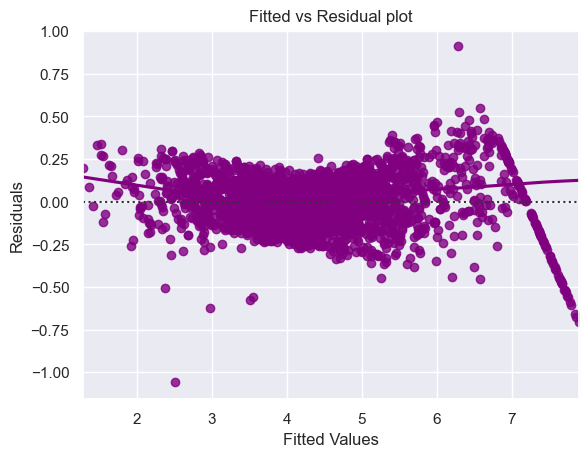

In [341]:
# let's plot the fitted values vs residuals

sns.residplot(data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

* The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values)
#### We see a very faint "U" pattern in the plot of residuals vs fitted values, however, this can be considered negligible given the range of residuals is very close to 0 (between -0.5 and 0.5). The pattern may indicate that the model has some non linear dependancies and may be improved by transforming the columns or better defined by non-linear models


* Evaluated a model without transforming the used_price and new_price columns, and found that the resulting plot of residuals vs. fitted had strongly non-linear dependancies. Then evaluated a model with log transformations of used_price and new_price columns which was found to be heteroscedastic in nature. A sqrt and cbrt transformation was then carried out, and it was determined that cbrt transformation offers the best middleground solution for problem at hand

#### Given the context of the problem, assumption is satified

### TEST FOR NORMALITY

* Error terms, or residuals, should be normally distributed. If the error terms are not normally distributed, confidence intervals of the coefficient estimates may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares. Non-normality suggests that there are a few unusual data points that must be studied closely to make a better model

* The shape of the histogram of residuals can give an initial idea about the normality
* It can also be checked via a Q-Q plot of residuals. If the residuals follow a normal distribution, they will make a straight line plot, otherwise not
* Other tests to check for normality includes the Shapiro-Wilk test
    - Null hypothesis: Residuals are normally distributed
    - Alternate hypothesis: Residuals are not normally distributed


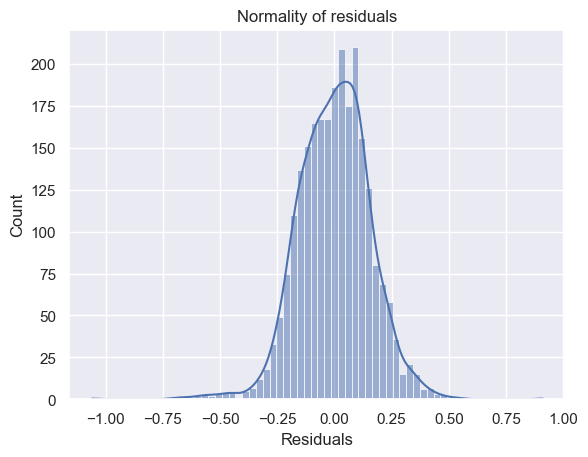

In [342]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

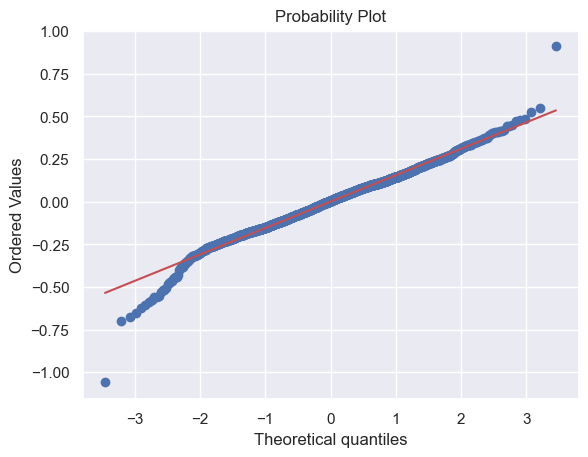

In [343]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

- The residuals more or less follow a straight line except for the tails
- Let's check the results of the Shapiro-Wilk test

In [344]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9849575161933899, pvalue=1.3140487978876951e-15)

* Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test
* Strictly speaking, the residuals are not normal
* However, as an approximation, we can accept this distribution as close to being normal
#### So, the assumption is satisfied

### TEST FOR HOMOSCEDASTICITY

* **Homoscedascity**: If the variance of the residuals is symmetrically distributed across the regression line, then the data is said to be homoscedastic

* **Heteroscedascity**: If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic

* The presence of non-constant variance in the error terms results in heteroscedasticity. Generally, non-constant variance arises in presence of outliers

* The residual vs fitted values plot can be looked at to check for homoscedasticity. In the case of heteroscedasticity, the residuals can form an arrow shape or any other non-symmetrical shape
* The goldfeldquandt test can also be used. If we get a p-value > 0.05 we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic
    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedasticity

In [345]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 1.0976270692974759), ('p-value', 0.05045385909478367)]

In [346]:
# Let us write the equation of linear regression
Equation = "Used Phone Price ="
print(Equation, end=" ")
for i in range(len(x_train3.columns)):
    if i == 0:
        print(np.round(olsmod2.params[i], 4), "+", end=" ")
    elif i != len(x_train3.columns) - 1:
        print(
            "(",
            np.round(olsmod2.params[i], 4),
            ")*(",
            x_train3.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print("(", np.round(olsmod2.params[i], 4), ")*(", x_train3.columns[i], ")")



Used Phone Price = 1.0954 + ( 0.003 )*( screen_size ) +  ( 0.0055 )*( selfie_camera_mp ) +  ( 0.0007 )*( int_memory ) +  ( -0.0015 )*( days_used ) +  ( 0.7257 )*( transform_new_price ) +  ( -0.029 )*( 4g_yes ) +  ( 0.0731 )*( 5g_yes )


#### Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied

In [347]:
# predictions on the test set
pred = olsmod2.predict(x_test3)

df_pred_test = pd.DataFrame({"Actual": y_test**(3), "Predicted": pred**(3)})
print("Sample of Actual and Predicted used_price by the ML model (in €)")
df_pred_test.sample(10, random_state=1)




Sample of Actual and Predicted used_price by the ML model (in €)


,Actual,Predicted
2098,30.520000,28.686548
278,195.670000,197.071509
26,314.660000,262.360813
2910,89.970000,87.418062
2631,69.200000,65.132657
1582,89.580000,107.239427
2110,371.666317,350.060667
3160,65.340000,61.416462
2817,115.770000,106.015262
549,39.290000,43.626936


In [348]:
import pickle
from sklearn.linear_model import LinearRegression

linearregression = LinearRegression()
linearregression.fit(x_train3, y_train)
with open('linearregression.pkl', 'wb') as f:
    pickle.dump(linearregression, f)

In [350]:
# predictions on the test set
import numpy as np
import pandas as pd

# Créer une nouvelle pandas DataFrame contenant les nouvelles données à prédire
new_data_pred = pd.DataFrame({"const": [1.0954], "screen_size": [15.54 ], "selfie_camera_mp": [5] , "int_memory": [8 ], "days_used": [300], "transform_new_price": [ 7.48 ] , "4g_yes": [1 ], "5g_yes": [0 ]})

# Convertir la pandas DataFrame en tableau NumPy
x_test3_pred = np.array(new_data_pred)

#Faire une prédiction avec le modèle de régression linéaire entraîné (olsmod2)
pred = olsmod2.predict(x_test3_pred)

print((pred))

# Afficher les prédictions
print("votre samsung A31 vaut  ", pred**3)
# Créer une pandas DataFrame contenant les valeurs prédites et réelles et les afficher
# df_pred_test = pd.DataFrame({"Actual": y_test**(3), "Predicted": pred**(3)})
# print("Sample of Actual and Predicted used_price by the ML model (in €)")
# df_pred_test.sample(10, random_state=1)
# x_test3
# predictions on the test set

# # Créer un nouveau jeu de données (new_data)
# new_data = np.array([[1.0954,21.43, 32, 128,520,7.314 ,1,0]])

# # Faire une prédiction avec le modèle de régression linéaire entraîné (olsmod2)
# predictions = olsmod2.predict(new_data)

# # Afficher les prédictions
# print(predictions)

[6.21682494]
votre samsung A31 vaut   [240.27352191]


In [ ]:
# predictions on the test set
import numpy as np
import pandas as pd

# Créer une nouvelle pandas DataFrame contenant les nouvelles données à prédire
new_data_pred = pd.DataFrame({"const": [1.0954], "screen_size": [16.51], "selfie_camera_mp": [5] , "int_memory": [6 ], "days_used": [300], "transform_new_price": [9.16] , "4g_yes": [1 ], "5g_yes": [0 ]})

# Convertir la pandas DataFrame en tableau NumPy
x_test3_pred = np.array(new_data_pred)

#Faire une prédiction avec le modèle de régression linéaire entraîné (olsmod2)
pred = olsmod2.predict(x_test3_pred)

print((pred))

# Afficher les prédictions
print("votre  vaut  ", pred**3)

[7.44203759]
votre  vaut   [412.16924015]


In [ ]:


# Créer un nouveau jeu de données (new_data)
new_data = np.array([[1.0954,15.25, 7, 32,300,18.06,1,0]])

# Faire une prédiction avec le modèle de régression linéaire entraîné (olsmod2)
predictions = olsmod2.predict(new_data)

# Afficher les prédictions
print(predictions **3)

[2697.69212639]


In [ ]:
# Créer un nouveau jeu de données (new_data)
new_data = np.array([[1.0954,10.43, 2, 16,959,4.66 ,0,0]])

# Faire une prédiction avec le modèle de régression linéaire entraîné (olsmod2)
predictions = olsmod2.predict(new_data)

# Afficher les prédictions
print(predictions**3)

[31.55860304]


* We can observe here that our model has returned good prediction results, and the actual and predicted (used_price) are comparable,  although there is further scope for improvement

* We can also visualize comparison result as a bar graph

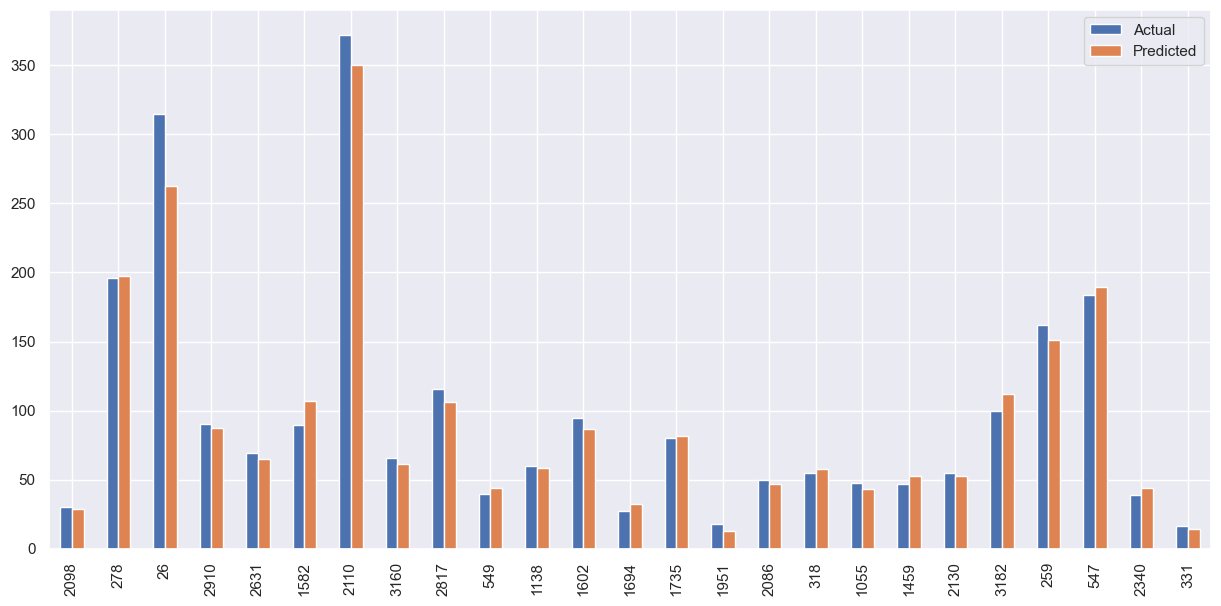

In [ ]:
df1 = df_pred_test.sample(25, random_state=1)
df1.plot(kind="bar", figsize=(15, 7))
plt.show()

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train3, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.156098,0.121676,0.981751,0.981692,2.889344


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test3, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.152391,0.121154,0.982337,0.982204,2.808288


* The model is able to explain ~98% of the variation in the data, which is very good

* The train and test RMSE and MAE (~0.15 and ~0.12) are low and comparable. So, our model is not suffering from overfitting

* The MAPE on the test set suggests we can predict within 2.8% of cbrt(used_price) 

* Hence, we can conclude the model *olsmod2* is good for prediction as well as inference purposes

**Comparing the initial model created with sklearn and the final statsmodels model**

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [linearregression_train_perf.T, olsmod2_train_perf.T],
    axis=1,
)

models_train_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression statsmodels",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Linear Regression sklearn,Linear Regression statsmodels
RMSE,0.155290,0.156098
MAE,0.121173,0.121676
R-squared,0.981939,0.981751
Adj. R-squared,0.981845,0.981692
MAPE,2.881368,2.889344


In [ ]:
# test performance comparison

models_test_comp_df = pd.concat(
    [linearregression_test_perf.T, olsmod2_test_perf.T],
    axis=1,
)

models_test_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression statsmodels",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Linear Regression sklearn,Linear Regression statsmodels
RMSE,0.152659,0.152391
MAE,0.121623,0.121154
R-squared,0.982275,0.982337
Adj. R-squared,0.982057,0.982204
MAPE,2.827214,2.808288


* The performance of the two models is close to each other

**Recreating the final statsmodels model and printing it's summary to gain insights.**

In [ ]:
olsmodel_final = sm.OLS(y_train, x_train3).fit()
print(olsmodel_final.summary())

                             OLS Regression Results                             
Dep. Variable:     transform_used_price   R-squared:                       0.982
Model:                              OLS   Adj. R-squared:                  0.982
Method:                   Least Squares   F-statistic:                 1.914e+04
Date:                  Tue, 04 Apr 2023   Prob (F-statistic):               0.00
Time:                          12:32:24   Log-Likelihood:                 1095.4
No. Observations:                  2499   AIC:                            -2175.
Df Residuals:                      2491   BIC:                            -2128.
Df Model:                             7                                         
Covariance Type:              nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const         

### Conclusions



   * As expected, we can see that selfie_camera, screen_size, and int_memory are significant parameters (more significant in this order as well). As these increases, the cbrt(used_price), and by default used_price is expected to increase. This is indicated by positive coefficients for these parameters predicted by the model
   * EDA post data processing also indicated high_brand (i.e., expensive brands) have the maximum number of refurbished phones with large screen_size and better selfie_camera and low_brand (i.e, cheaper brands) have the lowest number of such refurbished phones, thereby reaffirming the validity of the model
   
   
   * 1 unit increase in cbrt(new_price) is expected to increase cbrt(used_price) by almost 0.7257 units
   * linear correlation between cbrt(used_price) and cbrt(new_price) ; used_price and new_price during EDA was found to be strongly postive (0.93), therby reafirming model validity
   
   
   * 4g and 5g are both significant parameters, with 5g marginally contributing positively and 4g marginally contributing negatively to cbrt(used_price) and used_price, as expected 
   
   
   * Preliminary EDA revealed moderately positive correlation between weight of the phone and battery as the battery size increases (0.7), however, weight and battery have been found to be not significant factors in predicting cbrt(used_price) or by default used_price. RAM for the refurbished phones was found to be constant ~4GB on average across the dataset, and also insignificant. Similar to RAM, almost 90% of phones were found to be operating on Android os, also insignificant factor for prediction
   
   
   * The linear predictive model is able to predict the cbrt(used_price) of the phone, explaining ~98% of the variance in the data, within a mean absolute percentage error of ~2.8%. The model is hence good
   * All of the assumptions for linear regression were met for the model - multicollinearity or predictor VIFs<5, normality of error terms and homoscedasticity. While the independence and linearity assumption can be assumed met after suitable transformation/data preprocessing, the data gave the impression that non-linear models may be more suited for prediction